## PROJET : Analyse Exploratoire Des Données  
<h3 style="color:black;text-align:center;padding: 2% 20% ">STEVE DIFFO</h3>

## PROBLEMATIQUE 2: Marketing : Quels sont les segments de clients les plus rentables en fonction de leurs interactions avec des campagnes ?



## Table des matieres
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#preparationDonnees">Préparation des Données</a></li>
<li><a href="#Analyse">Analyse Exploratoire des Données</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>


<a id='intro'></a>
## INTRODUCTION

> Ce rapport permet d'analyser les segment de clients les plus rentables . nous allons utiliser un ensemble de données provenant de Kaggle . le lien vers notre ensemble de données ce trouve sur L'URL https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data



>L'objectif principal est : ** d'identifer les segments de clients les plus rentables en fonction de leurs interactions avec des campagnes 

In [186]:
# importation des bibliotheques 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

%matplotlib inline


<a id='preparationDonnees'></a>

## PREPARATION DES DONNEES 

> Dans cette partie nous allons charger nos donneées ,vérifier leurs proprietés et les néttoyer

## Propriete Generale des données

In [187]:
#chargement des données
df=pd.read_csv('marketing_campaign.csv', delimiter=';')
# Taille des données
print(df.shape)
#informations
print(df.info())
df.head()

(2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 n

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


>Nous constatons que nous avons la colonne Dt_Customer de type Objet nous allons l'a changé à date_time

In [188]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

>verification des valeurs vides et dupliquees

In [189]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

>Nous constatons que nous avons 24 valeurs vide dans la colonne revenu du ménage alors nous alons suprimer les lignes avec les valeurs nulles

>>Nous remplaçons les revenu nulles par la moyenne des revenu pour plus de cohérence avec nos données 

In [190]:
moy_Income=df['Income'].mean()
moy_Income
df['Income']=df['Income'].fillna(moy_Income)


In [191]:
#vérifions les doublons
df.duplicated().sum()

0

In [192]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [193]:
# Encodage des variables catégorielles (Éducation, Mariage)
#df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Afficher les premières lignes du DataFrame prétraité
#df.head()


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<a id='Analyse'></a>

## Analyse Exploratoire Des Données

In [195]:

# Statistiques descriptives
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


- Déterminons le produit qui a été le plus vendu

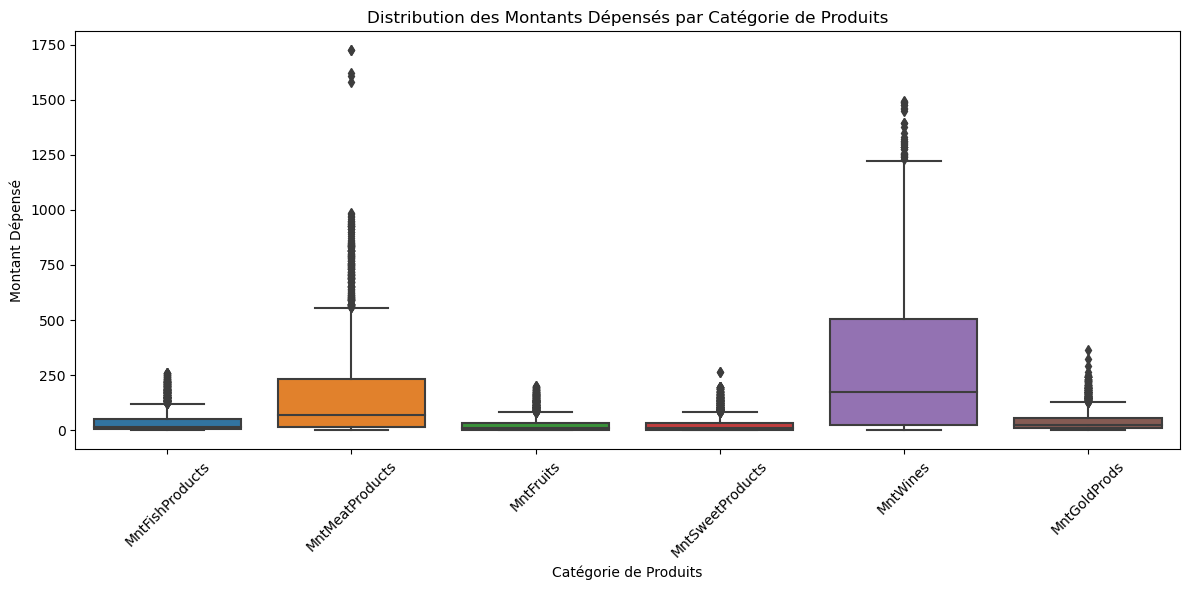

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Réorganiser les données en format long
df_melted = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].melt(
    var_name='Catégorie', 
    value_name='Montant'
)

#Tracer le boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Catégorie', y='Montant', data=df_melted)
plt.title('Distribution des Montants Dépensés par Catégorie de Produits')
plt.xlabel('Catégorie de Produits')
plt.ylabel('Montant Dépensé')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


>MntWines :
>- C’est la catégorie où les clients dépensent le plus en moyenne et en général.
>- Distribution très étendue, avec beaucoup de valeurs extrêmes élevées (certains clients dépensent énormément en vin).

>MntMeatProducts :
>- Deuxième plus grosse dépense.
>- Médiane assez élevée et beaucoup de variabilité.
>- Présence d'outliers très importants (jusqu’à 1750).

>MntFishProducts, MntFruits, MntSweetProducts, MntGoldProds :
>- Dépenses plus faibles et concentrées.
>- Médianes basses, peu de variabilité.
>- Quelques outliers, mais moins extrêmes.


>- Le vin et la viande sont les catégories où les clients dépensent le plus, avec des profils de consommation très variés.
>- Les fruits, poissons, produits sucrés et gold sont moins dépensés et ont une consommation plus homogène.
>- Le graphique peut aussi révéler des profils de clients (ex. : certains très dépensiers en vin/viande).


#### Calculons la somme des depenses effectuées par customa  

In [197]:
df['Total_Mnt_Products'] = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)


In [198]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Mnt_Products
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


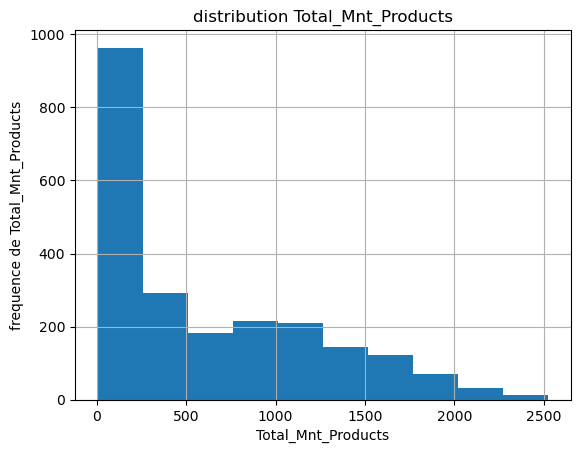

In [199]:
df['Total_Mnt_Products'].hist()
plt.title('distribution Total_Mnt_Products')
plt.xlabel('Total_Mnt_Products')
plt.ylabel('frequence de Total_Mnt_Products')
plt.show()

In [200]:
#statstique descriptive du total des montant dépensé par client 
df['Total_Mnt_Products'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: Total_Mnt_Products, dtype: float64

- créons un indicateur d'interaction aux campagnes

In [201]:
#Créer un indicateur d'interaction aux campagnes

df['TotalAcceptedCampaigns'] = df[['AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

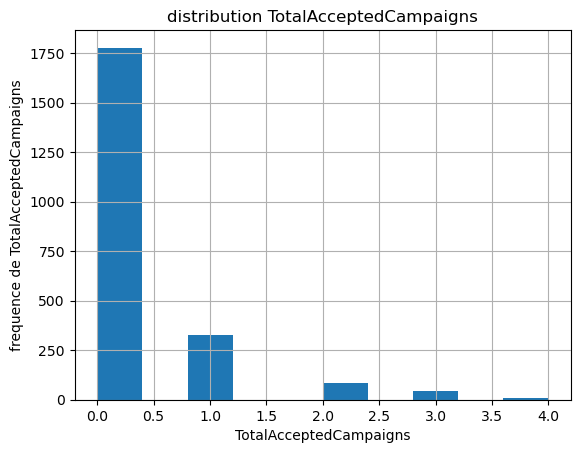

In [202]:
df['TotalAcceptedCampaigns'].hist()
plt.title('distribution TotalAcceptedCampaigns')
plt.xlabel('TotalAcceptedCampaigns')
plt.ylabel('frequence de TotalAcceptedCampaigns')
plt.show()

In [203]:
#statistiques descriptive de leurs interaction 
df['TotalAcceptedCampaigns'].describe()

count    2240.000000
mean        0.297768
std         0.678381
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: TotalAcceptedCampaigns, dtype: float64

- Création des segments selon leur niveau d'interaction et niveau de dépense :

In [204]:
#Crée des segments selon leur niveau d'interaction et niveau de dépense :

df['EngagementLevel'] = pd.cut(df['TotalAcceptedCampaigns'],
                               bins=[-1, 0, 2, 5],
                               labels=['Non engagé', 'Modérément engagé', 'Très engagé'])

df['SpendingLevel'] = pd.qcut(df['Total_Mnt_Products'], q=3,
                              labels=['Faible dépense', 'Dépense moyenne', 'Forte dépense'])


In [205]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Mnt_Products,TotalAcceptedCampaigns,EngagementLevel,SpendingLevel
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,1617,0,Non engagé,Forte dépense
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,27,0,Non engagé,Faible dépense
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,776,0,Non engagé,Dépense moyenne
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,53,0,Non engagé,Faible dépense
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,422,0,Non engagé,Dépense moyenne


- Utilisons un groupby pour voir la rentabilité moyenne par segment :

In [206]:
#Utilise un groupby pour voir la rentabilité moyenne par segment :

df.groupby(['EngagementLevel', 'SpendingLevel'])['Total_Mnt_Products'].mean().unstack()


SpendingLevel,Faible dépense,Dépense moyenne,Forte dépense
EngagementLevel,,,
Non engagé,50.818578,401.045313,1244.145089
Modérément engagé,55.898305,479.009901,1470.500000
Très engagé,NaN,654.500000,1744.078431


#### Donc nous constatons que les client les plus rentable sont les clients les plus engagés

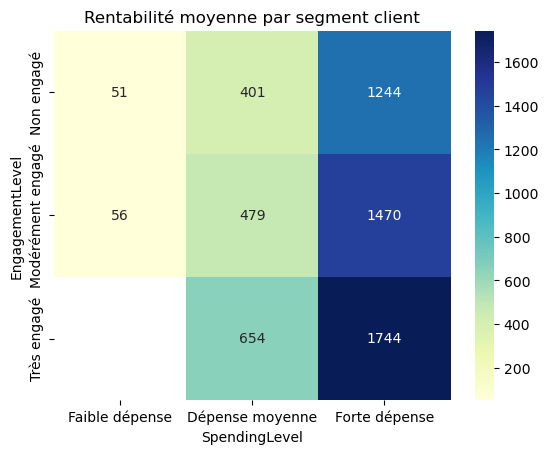

In [207]:
# faire un heatmap pour visualiser :


import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.groupby(['EngagementLevel', 'SpendingLevel'])['Total_Mnt_Products'].mean().unstack()
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Rentabilité moyenne par segment client")
plt.show()


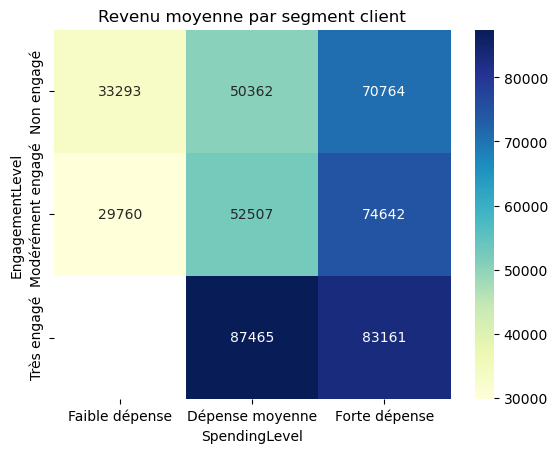

In [208]:

import seaborn as sns
import matplotlib.pyplot as plt

pivot = df.groupby(['EngagementLevel', 'SpendingLevel'])['Income'].mean().unstack()
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Revenu moyenne par segment client")
plt.show()

### les segments de clients les plus rentables en fonction de leurs interactions avec des campagnes

In [209]:
customa_enga=df[df['EngagementLevel'] =='Très engagé']
customa_enga

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Mnt_Products,TotalAcceptedCampaigns,EngagementLevel,SpendingLevel
124,7215,1983,Graduation,Single,101970.0,0,0,2013-03-12,69,722,...,1,0,0,3,11,1,1135,3,Très engagé,Forte dépense
203,2798,1977,PhD,Together,102160.0,0,0,2012-11-02,54,763,...,1,0,0,3,11,1,1240,3,Très engagé,Forte dépense
246,2176,1972,Graduation,Married,80134.0,1,0,2013-05-20,40,1218,...,1,0,0,3,11,1,1690,3,Très engagé,Forte dépense
252,10089,1974,Graduation,Divorced,102692.0,0,0,2013-04-05,5,168,...,1,1,0,3,11,1,1112,4,Très engagé,Forte dépense
336,7381,1968,Graduation,Divorced,75693.0,0,0,2012-12-06,10,797,...,1,0,0,3,11,1,1442,3,Très engagé,Forte dépense
417,5067,1994,Graduation,Together,80134.0,0,0,2014-02-14,11,966,...,1,1,0,3,11,0,1378,4,Très engagé,Forte dépense
426,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,...,1,0,0,3,11,0,1795,3,Très engagé,Forte dépense
430,3725,1961,PhD,Single,84865.0,0,0,2013-05-09,1,1248,...,1,1,0,3,11,1,1688,4,Très engagé,Forte dépense
559,3174,1959,Graduation,Together,87771.0,0,1,2013-05-22,61,1492,...,1,1,0,3,11,1,1957,4,Très engagé,Forte dépense
575,2574,1977,PhD,Married,61996.0,0,1,2013-01-31,27,1050,...,1,1,0,3,11,1,1230,3,Très engagé,Forte dépense


In [210]:
customa_enga['Education'].value_counts()

Education
Graduation    34
PhD           11
Master         7
2n Cycle       3
Name: count, dtype: int64

In [211]:
customa_enga['Marital_Status'].value_counts()

Marital_Status
Married     20
Together    16
Single       8
Divorced     8
Widow        3
Name: count, dtype: int64

In [212]:
customa_enga.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Mnt_Products,TotalAcceptedCampaigns
count,55.000000,55.000000,55.000000,55.000000,55.000000,55,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.0,55.0,55.0,55.000000,55.000000,55.000000
mean,4970.836364,1971.236364,83474.145455,0.072727,0.145455,2013-07-19 22:41:27.272727296,50.381818,931.890909,56.345455,452.672727,...,0.672727,0.963636,0.890909,0.345455,0.0,3.0,11.0,0.818182,1664.836364,3.200000
min,477.000000,1949.000000,48192.000000,0.000000,0.000000,2012-08-18 00:00:00,1.000000,152.000000,0.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,3.0,11.0,0.000000,523.000000,3.000000
25%,2554.500000,1959.000000,79967.000000,0.000000,0.000000,2013-03-04 00:00:00,27.000000,766.000000,16.500000,272.000000,...,0.000000,1.000000,1.000000,0.000000,0.0,3.0,11.0,1.000000,1410.000000,3.000000
50%,4580.000000,1972.000000,84460.000000,0.000000,0.000000,2013-07-09 00:00:00,56.000000,979.000000,28.000000,414.000000,...,1.000000,1.000000,1.000000,0.000000,0.0,3.0,11.0,1.000000,1690.000000,3.000000
75%,7606.500000,1981.000000,90123.500000,0.000000,0.000000,2013-12-18 12:00:00,75.000000,1201.000000,80.000000,719.500000,...,1.000000,1.000000,1.000000,1.000000,0.0,3.0,11.0,1.000000,2000.000000,3.000000
max,10446.000000,1994.000000,102692.000000,1.000000,2.000000,2014-06-17 00:00:00,98.000000,1493.000000,178.000000,935.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,3.0,11.0,1.000000,2524.000000,4.000000
std,3059.517614,12.349784,10390.109785,0.262082,0.404520,NaN,28.714747,376.636512,56.212302,262.933244,...,0.473542,0.188919,0.314627,0.479899,0.0,0.0,0.0,0.389249,483.865943,0.403687


### <a id='conclusion'></a>
## Conclusion

>L’analyse des données révèle que le segment de clients le plus rentable est composé de ceux qui manifestent un fort engagement envers les campagnes marketing, en acceptant entre 3 et 5 offres sur les 5 campagnes précédentes.

>Ces clients se démarquent par des caractéristiques sociodémographiques et comportementales bien définies :

- Année de naissance : entre 1949 et 1994  
- Revenu annuel : compris entre 48 192 et 102 692, avec une moyenne élevée de 83 474 — nettement supérieure à celle des autres segments  
- Structure familiale : au maximum 1 enfant et 2 adolescents à domicile  
- Niveau d’éducation : majoritairement diplômés de niveau Graduation ou supérieur (Master, PhD)  
- Comportement d’achat :
  - Achats en ligne : de 2 à 11, avec une moyenne de 5  
  - Achats en magasin : de 4 à 13, moyenne de 8  
  - Achats via catalogue : de 2 à 11, moyenne de 6  
  - Achats avec réduction : de 0 à 5, moyenne de 1  
### Recommandation stratégique
>Ces clients constituent une cible privilégiée pour les futures campagnes marketing. Mieux comprendre leur profil permet à l’entreprise de concevoir des offres plus personnalisées, d’améliorer la pertinence de ses messages publicitaires et ainsi, de maximiser le retour sur investissement de ses actions marketing.

